In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df0 = pd.read_csv('COVID19.csv')
# df0

In [3]:
# df0.groupby('location')['total_cases'].sum()
# df0['location'].unique()

In [4]:
df1 = pd.read_csv('COVID-19 Cases.csv')

In [5]:
df1

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
0,Confirmed,319,1,4/11/2020,Mauritius,NaN,NaN,NaN,NaN,-20.200000,57.500000,Time Series,4/12/2020 8:14:42 PM
1,Deaths,0,0,2/27/2020,Bahamas,NaN,NaN,NaN,NaN,25.034300,-77.396300,Time Series,4/12/2020 8:14:42 PM
2,Confirmed,16,0,2/16/2020,Germany,NaN,NaN,NaN,NaN,51.000000,9.000000,Time Series,4/12/2020 8:14:42 PM
3,Deaths,0,0,1/31/2020,Canada,Alberta,NaN,NaN,NaN,53.933300,-116.576500,Time Series,4/12/2020 8:14:42 PM
4,Deaths,0,0,3/4/2020,Australia,Queensland,NaN,NaN,NaN,-28.016700,153.400000,Time Series,4/12/2020 8:14:42 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575635,Confirmed,0,0,1/22/2020,US,New Mexico,Sierra,"Sierra, New Mexico, US",35051.0,33.130282,-107.192589,Time Series,4/12/2020 8:14:42 PM
575636,Deaths,0,0,1/22/2020,US,Louisiana,Lafayette,"Lafayette, Louisiana, US",22055.0,30.204905,-92.069599,Time Series,4/12/2020 8:14:42 PM
575637,Deaths,0,0,1/22/2020,Uzbekistan,NaN,NaN,NaN,NaN,41.377500,64.585300,Time Series,4/12/2020 8:14:42 PM
575638,Deaths,0,0,1/22/2020,US,Virginia,Bristol,"Bristol, Virginia, US",51520.0,36.616302,-82.163591,Time Series,4/12/2020 8:14:42 PM


This dataset represents the total of confirmed cases and deaths of COVID-19. The columns include the case type (string), the number of cases (int), date (datetime), country region (string), longitude and latitude (float), etc. It also provides more information about US cases by adding the columns "Province State", "Admin2", "Combined Key"(string) and "FIPS"(float).

Reference：https://www.tableau.com/about/blog/2020/3/coronavirus-data-hub-faq

 • The name of this dataset is "COVID-19 Cases".
 
 • I got this dataset from the website "data.world". The orginal source is Johns Hopkins University Center for Systems Science and Engineering.

 •  The link is
 https://data.world/covid-19-data-resource-hub/covid-19-case-counts/workspace/file?filename=COVID-19+Cases.csv
 
 • I cannot find the license information about this dataset, but it is known that the dataset is open to public.
 
 • We are allowed to add new data source, join the tables, etc. We are also allowed to use it for analysis.
 
 • The size of this file is 84.1MB, and there are 575640 rows and 13 columns in this dataset.
 
 • The simple plot is as follow.
 

Getting familiar with the country and region information..

In [6]:
df1['Country_Region'].unique()

array(['Mauritius', 'Bahamas', 'Germany', 'Canada', 'Australia',
       'Suriname', 'Estonia', 'Slovakia', 'Croatia', 'Timor-Leste',
       'Brazil', 'China', 'North Macedonia', 'Israel', 'Netherlands',
       'Namibia', 'Yemen', 'France', 'Mozambique', 'Argentina',
       'United Arab Emirates', 'Honduras', 'Malta', 'Gabon', 'Bulgaria',
       'United Kingdom', 'Singapore', 'New Zealand', 'Mexico', 'Panama',
       'Fiji', 'Kuwait', 'Ghana', 'Thailand', 'Costa Rica',
       'Bosnia and Herzegovina', 'Korea, South', 'South Sudan', 'Gambia',
       'Mali', 'Iran', 'Saint Vincent and the Grenadines', 'Tunisia',
       'Algeria', 'Sao Tome and Principe', 'Iraq', 'Albania', 'Nigeria',
       'Sierra Leone', 'Liberia', 'Lebanon', 'Laos', 'Liechtenstein',
       'Nicaragua', "Cote d'Ivoire", 'Holy See', 'Armenia', 'Georgia',
       'Luxembourg', 'Haiti', 'Grenada', 'Czechia', 'Cuba', 'Morocco',
       'Guyana', 'Taiwan*', 'Chad', 'Andorra', 'Afghanistan',
       'Saint Kitts and Nevis', 'Uga

In [7]:
df1[df1['Case_Type']=='Confirmed'].groupby('Country_Region')['Cases'].sum()

Country_Region
Afghanistan            6065
Albania                6630
Algeria               22032
Andorra                9068
Angola                  224
                      ...  
West Bank and Gaza     4164
Western Sahara           34
Yemen                     3
Zambia                  665
Zimbabwe                181
Name: Cases, Length: 184, dtype: int64

In [8]:
df1[df1['Case_Type']=='Deaths'].groupby('Country_Region')['Cases'].sum()

Country_Region
Afghanistan            164
Albania                336
Algeria               2485
Andorra                291
Angola                  30
                      ... 
West Bank and Gaza      21
Western Sahara           0
Yemen                    0
Zambia                  14
Zimbabwe                32
Name: Cases, Length: 184, dtype: int64

In [9]:
df1.groupby('Country_Region')['Cases'].sum()

Country_Region
Afghanistan            6229
Albania                6966
Algeria               24517
Andorra                9359
Angola                  254
                      ...  
West Bank and Gaza     4185
Western Sahara           34
Yemen                     3
Zambia                  679
Zimbabwe                213
Name: Cases, Length: 184, dtype: int64

Getting familiar with the date information..

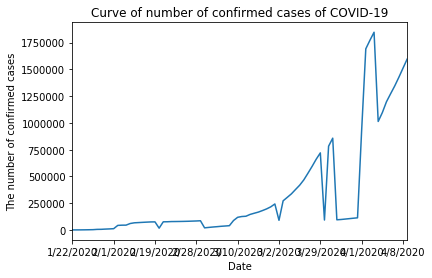

In [10]:
df1[df1['Case_Type']=='Confirmed'].groupby('Date')['Cases'].sum().plot()
plt.title('Curve of number of confirmed cases of COVID-19')
plt.ylabel('The number of confirmed cases')
plt.xlabel('Date')
plt.show()

The curve shows an upward trend, which is consistent with our expectations, but it is weird that there is a sharp drop in the plot. I will try to explore the reason of it in the following parts.